In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [3]:
gpu = tf.config.list_physical_devices('GPU')
if gpu:
    try:
        tf.config.set_visible_devices(gpu[0],'GPU')
        tf.config.experimental.set_memory_growth(gpu[0],True)
        print("Using" , gpu[0])
    except RuntimeError as e:
        print(e)
else:
    print("no found")

Physical devices cannot be modified after being initialized


In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [5]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name =='block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='E:/study/deeplearning campusx/cnn/Cats_VS_Dogs Self model/train',
    labels='inferred',
    label_mode='int',#for cat -0,for dog-1
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='E:/study/deeplearning campusx/cnn/Cats_VS_Dogs Self model/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#normalise
def process(image,lable):
    image = tf.cast(image/256. ,tf.float32)
    return image,lable
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\manve\anaconda3\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**run this to train model**

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 104ms/step - loss: 0.2315 - accuracy: 0.9028 - val_loss: 0.1611 - val_accuracy: 0.9328
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1300 - accuracy: 0.9496 - val_loss: 0.1339 - val_accuracy: 0.9456
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0915 - accuracy: 0.9669 - val_loss: 0.1297 - val_accuracy: 0.9488
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0631 - accuracy: 0.9782 - val_loss: 0.1360 - val_accuracy: 0.9478
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.1318 - val_accuracy: 0.9528
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0258 - accuracy: 0.9935 - val_loss: 0.1442 - val_accuracy: 0.9516
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.0168 - accuracy: 0.9959 - val_loss: 0.1539 - val_ac

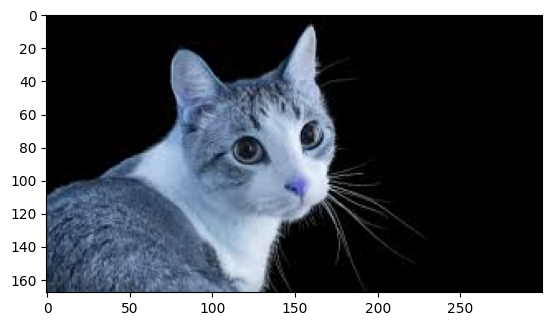

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('E:/study/deeplearning campusx/cnn/Cats_VS_Dogs Self model/cat1.jpg')
plt.imshow(test_img)

In [14]:
test_img.shape

(168, 300, 3)

In [15]:
test_img = cv2.resize(test_img,(150,150))
test_img.shape

(150, 150, 3)

In [ ]:
#0 for cat and 1 for dog
test_input = test_img.reshape(1,150,150,3)
pred=model.predict(test_input)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.]]


In [19]:
test_img_dog = cv2.imread("E:/study/deeplearning campusx/cnn/Cats_VS_Dogs Self model/dog2.jpg")
test_img_dog = cv2.resize(test_img_dog,(150,150))

In [20]:
test_input = test_img_dog.reshape(1,150,150,3)
pred = model.predict(test_input)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[1.]]
